In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('outliers_scout_auto.csv')

In [3]:
df.shape

(14376, 30)

In [4]:
df.head()

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,...,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
0,Audi A1,Sedans,15770,3.0,56013.0,Diesel,Used,2.0,Black,Metallic,...,Black,VAT deductible,5.0,5.0,1422.0,3.0,1220.00000,front,99.0,7.0
1,Audi A1,Sedans,14500,2.0,80000.0,Benzine,Used,1.0,Red,Metallic,...,Grey,Price negotiable,3.0,4.0,1798.0,4.0,1255.00000,front,129.0,7.0
2,Audi A1,Sedans,14640,3.0,83450.0,Diesel,Used,1.0,Black,Metallic,...,Black,VAT deductible,4.0,4.0,1598.0,4.0,1257.35941,front,99.0,7.0
3,Audi A1,Sedans,14500,3.0,73000.0,Diesel,Used,1.0,Brown,Metallic,...,Cloth,VAT undeductible,3.0,4.0,1422.0,3.0,1195.00000,front,99.0,6.0
4,Audi A1,Sedans,16790,3.0,16200.0,Diesel,Used,1.0,Black,Metallic,...,Black,VAT undeductible,5.0,5.0,1422.0,3.0,1257.35941,front,109.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14376 entries, 0 to 14375
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_model            14376 non-null  object 
 1   body_type              14376 non-null  object 
 2   price                  14376 non-null  int64  
 3   age                    14376 non-null  float64
 4   km                     14376 non-null  float64
 5   Fuel                   14376 non-null  object 
 6   Type                   14376 non-null  object 
 7   prev_owner             14376 non-null  float64
 8   Body Color             14376 non-null  object 
 9   Paint Type             14376 non-null  object 
 10  Gearing Type           14376 non-null  object 
 11  hp                     14376 non-null  float64
 12  Consumption_comb       14376 non-null  float64
 13  Consumption_city       14376 non-null  float64
 14  Consumption_country    14376 non-null  float64
 15  Co

In [6]:
df.isnull().sum()

brand_model              0
body_type                0
price                    0
age                      0
km                       0
Fuel                     0
Type                     0
prev_owner               0
Body Color               0
Paint Type               0
Gearing Type             0
hp                       0
Consumption_comb         0
Consumption_city         0
Consumption_country      0
Comfort & Convenience    0
Entertainment & Media    0
Safety & Security        0
Extras                   0
Upholstery_type          0
Upholstery_color         0
vat                      0
Nr. of Doors             0
Nr. of Seats             0
Displacement             0
Cylinders                0
Weight                   0
Drive chain              0
CO2 Emission             0
Gears                    0
dtype: int64

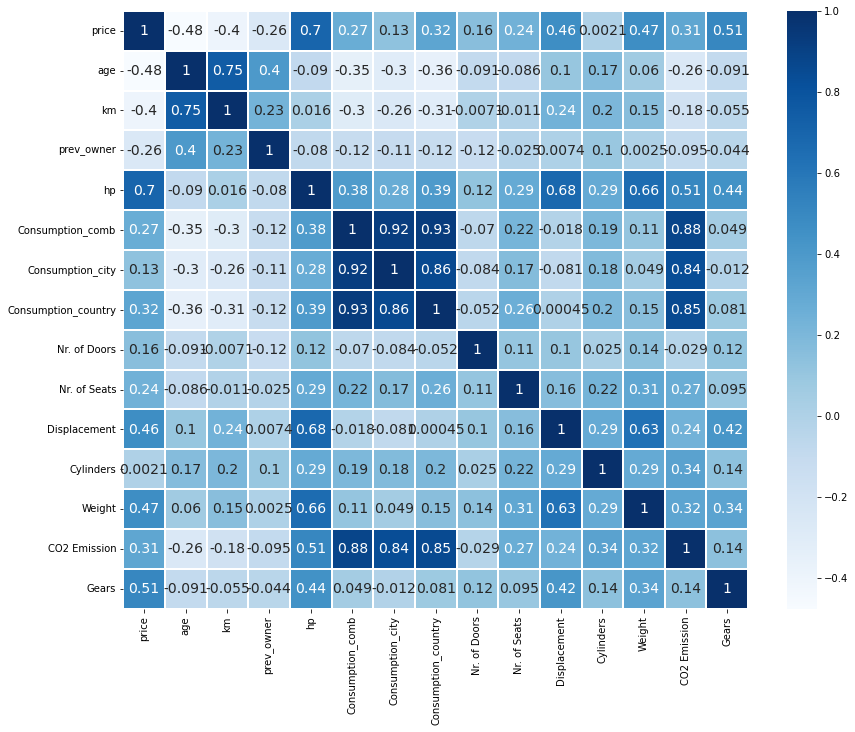

In [7]:
plt.figure(figsize=(14, 11))

sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 14});

### As we can see from the graph,correlation between  'CO2 Emission' and 'Consumption_comb', 'Consumption_city', 'Consumption_countr'  almost 0.90 so we will drop these columns just leave 'Consumption_comb' columns.

In [8]:
df.drop(columns=['Consumption_country','Consumption_city','CO2 Emission'],inplace=True)

In [9]:
df.columns

Index(['brand_model', 'body_type', 'price', 'age', 'km', 'Fuel', 'Type',
       'prev_owner', 'Body Color', 'Paint Type', 'Gearing Type', 'hp',
       'Consumption_comb', 'Comfort & Convenience', 'Entertainment & Media',
       'Safety & Security', 'Extras', 'Upholstery_type', 'Upholstery_color',
       'vat', 'Nr. of Doors', 'Nr. of Seats', 'Displacement', 'Cylinders',
       'Weight', 'Drive chain', 'Gears'],
      dtype='object')

In [10]:
df=df.join(df['Comfort & Convenience'].str.get_dummies(sep=",").add_prefix("cc_"))

In [11]:
df=df.join(df[ 'Entertainment & Media'].str.get_dummies(sep=",").add_prefix("em_"))

In [12]:
df=df.join(df['Safety & Security'].str.get_dummies(sep=",").add_prefix("ss_"))

In [13]:
df=df.join(df['Extras'].str.get_dummies(sep=",").add_prefix("ex_"))


In [14]:
df.shape

(14376, 182)

In [23]:
df.drop(columns=['Comfort & Convenience', 'Entertainment & Media','Safety & Security','Extras'],inplace=True)

In [26]:
df.drop(columns=['Paint Type'],inplace=True)
#I am also dropped this column because paint of car has no effect on price.

In [27]:
len(df.columns)

177

In [28]:

df.select_dtypes('object').T

,0,1,2,3,4,5,6,7,8,9,...,14366,14367,14368,14369,14370,14371,14372,14373,14374,14375
brand_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Benzine,...,Benzine,Diesel,Benzine,Diesel,Diesel,Benzine,Diesel,Benzine,Diesel,Benzine
Type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used,...,Used,Demonstration,Demonstration,Pre-registered,New,Demonstration,New,Used,Pre-registered,Demonstration
Body Color,Black,Red,Black,Brown,Black,White,White,Red,Grey,White,...,Black,Black,Blue,White,Black,White,Grey,Grey,White,Grey
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,...,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Upholstery_type,Cloth,Cloth,Cloth,Cloth,Cloth,Part leather,Part leather,Cloth,Cloth,Cloth,...,Full leather,Full leather,Full leather,Full leather,Full leather,Full leather,Full leather,Cloth,Full leather,Full leather
Upholstery_color,Black,Grey,Black,Cloth,Black,Black,Black,Black,Grey,Cloth,...,Full leather,Full leather,Other,Grey,Full leather,Brown,Full leather,Full leather,Black,Brown
vat,VAT deductible,Price negotiable,VAT deductible,VAT undeductible,VAT undeductible,VAT undeductible,VAT deductible,VAT deductible,VAT undeductible,VAT undeductible,...,VAT undeductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
Drive chain,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,4WD


In [29]:
df_final=pd.get_dummies(df,drop_first=True)

In [30]:
df_final.isnull().sum().sum()

0

In [31]:
df_final.shape

(14376, 225)

In [32]:
df_final.to_csv('dummy_scout_car.csv')